Classifying Gaia alerts data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import healpy as hp



In [2]:
gaia_data = pd.read_csv("/home/esteban/Desktop/ml_gaia/alerts.csv")

In [3]:
print(gaia_data)

           #Name                 Date      RaDeg    DecDeg   AlertMag  \
0      Gaia22apm  2022-02-13 05:17:54  200.58364  -6.10488      17.03   
1      Gaia22apl  2022-02-13 07:13:16   73.63910 -27.72316      18.76   
2      Gaia22apk  2022-02-12 17:20:01  197.86097  -6.43970      18.85   
3      Gaia22apj  2022-02-13 03:21:52  306.62464  36.94113      18.26   
4      Gaia22api  2022-02-12 03:11:34  318.20285  37.09541      18.33   
...          ...                  ...        ...       ...        ...   
19097  Gaia14aae  2014-08-11 13:43:26  242.89156  63.14217      16.04   
19098  Gaia14aad  2014-08-08 01:17:01  209.68122  48.70098      18.28   
19099  Gaia14aac  2014-08-02 07:19:24  214.66744  56.46959      18.68   
19100  Gaia14aab  2014-07-27 19:10:29  206.91011  55.54871      19.11   
19101  Gaia14aaa  2014-08-30 02:22:31  200.25961  45.53943      17.32   

        HistoricMag   HistoricStdDev    Class            Published  \
0             18.39             0.45   BL Lac  2022-0

In [4]:
data_top = gaia_data.head() 

In [5]:
data_top

,#Name,Date,RaDeg,DecDeg,AlertMag,HistoricMag,HistoricStdDev,Class,Published,Comment,TNSid
0,Gaia22apm,2022-02-13 05:17:54,200.58364,-6.10488,17.03,18.39,0.45,BL Lac,2022-02-14 08:16:24,known blazar brightens by ~1 mag,AT2022clw
1,Gaia22apl,2022-02-13 07:13:16,73.63910,-27.72316,18.76,NaN,NaN,unknown,2022-02-14 08:16:20,candidate SN near galaxy pair APMUKS(BJ) B0452...,AT2022cli
2,Gaia22apk,2022-02-12 17:20:01,197.86097,-6.43970,18.85,19.31,0.13,unknown,2022-02-14 08:16:14,"Gaia, WISE and UV source brightens by 0.4 mag ...",AT2022clv
3,Gaia22apj,2022-02-13 03:21:52,306.62464,36.94113,18.26,18.52,0.06,unknown,2022-02-14 08:16:04,red Gaia source brightens by ~0.35 mag,AT2022clu
4,Gaia22api,2022-02-12 03:11:34,318.20285,37.09541,18.33,19.11,0.04,unknown,2022-02-13 11:40:34,Flare on Gaia source,AT2022cey


In [6]:
classes = gaia_data[" HistoricMag"].value_counts(dropna=False)

In [7]:
classes #we check what Gaia data has

NaN      10955
18.98       56
19.45       46
18.86       45
18.74       45
         ...  
9.63         1
14.41        1
10.82        1
10.99        1
20.80        1
Name:  HistoricMag, Length: 828, dtype: int64

In [8]:
onlysn=gaia_data.loc[gaia_data[" Class"].isin(["SN Ia"])]  # Picking up only supernovae Ia for training

In [9]:
onlysn[" Class"].value_counts(dropna=False)

SN Ia    1978
Name:  Class, dtype: int64

In [10]:
print(onlysn)

           #Name                 Date      RaDeg    DecDeg   AlertMag  \
12     Gaia22apa  2022-02-10 19:44:39   33.04045 -15.06349      18.45   
15     Gaia22aox  2022-02-11 10:49:36  216.20640  14.64354      18.48   
20     Gaia22aos  2022-02-11 12:56:14   89.56749 -39.52632      17.52   
31     Gaia22aoh  2022-02-10 16:00:05  258.15124  40.62000      18.64   
34     Gaia22aoe  2022-02-10 10:19:01  237.92917  34.04522      18.38   
...          ...                  ...        ...       ...        ...   
19024  Gaia14adb  2014-10-29 00:13:52  181.30013  21.83836      18.61   
19027  Gaia14acy  2014-10-26 21:01:38   10.16959 -28.95650      18.41   
19045  Gaia14acg  2014-10-23 16:03:42  199.25167  34.10236      17.84   
19052  Gaia14abz  2014-10-15 05:43:03  204.25331  46.96062      18.70   
19101  Gaia14aaa  2014-08-30 02:22:31  200.25961  45.53943      17.32   

        HistoricMag   HistoricStdDev  Class            Published  \
12              NaN              NaN  SN Ia  2022-02-12

In [11]:
only_supernovae= onlysn[[" AlertMag"," HistoricMag"," HistoricStdDev"]].dropna()

In [12]:
only_supernovae

,AlertMag,HistoricMag,HistoricStdDev
226,18.63,19.64,0.08
320,16.70,17.67,0.16
899,18.63,19.20,0.10
990,17.25,18.36,0.15
1226,19.03,20.25,0.08
1568,18.61,19.73,0.17
1658,18.54,20.40,0.08
1748,17.96,18.94,0.13
1963,18.27,19.49,0.11
2056,16.71,18.50,0.13


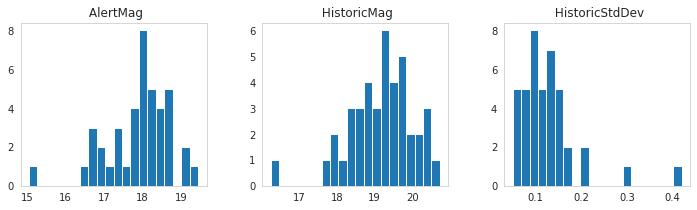

In [25]:
hist = only_supernovae.hist(layout=[1,3],grid=False,figsize=(12,3),bins=20)

In [14]:
only_supernovae.corr()

,AlertMag,HistoricMag,HistoricStdDev
AlertMag,1.000000,0.815665,0.008583
HistoricMag,0.815665,1.000000,0.099966
HistoricStdDev,0.008583,0.099966,1.000000
